In [15]:
import imageio
import os
import random

import pandas as pd
from scipy.misc import imread
from scipy.misc import imresize

root_dir = os.path.abspath('.')
data_dir = '/Users/kaushikganguly/Downloads/Data Science Masters/Analytics_Vidhya/Age Detection'

train = pd.read_csv(os.path.join(data_dir, 'train.csv'))
test = pd.read_csv(os.path.join(data_dir, 'test.csv'))


In [14]:
i = random.choice(train.index)

In [28]:
img_name = train.ID[i]
img = imageio.imread(os.path.join(data_dir, 'Train', img_name))

print("Age: ", train.Class[i)

Age:  YOUNG


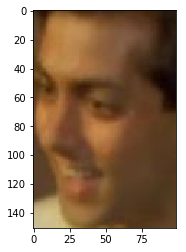

In [29]:
imshow(img)

In [34]:
from scipy.misc import imresize
from skimage import transform as tf

temp = []
for img_name in train.ID:
    img_path = os.path.join(data_dir, 'Train', img_name)
    img = imageio.imread(img_path)
    img = tf.resize(img, (32, 32))
    img = img.astype('float32') # this will help us in later stage
    temp.append(img)

train_x = np.stack(temp)

/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


In [35]:
temp = []
for img_name in test.ID:
    img_path = os.path.join(data_dir, 'Test', img_name)
    img = imageio.imread(img_path)
    img = tf.resize(img, (32, 32))
    temp.append(img.astype('float32'))

test_x = np.stack(temp)

/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


In [36]:
#Normalize the images
train_x = train_x / 255.
test_x = test_x / 255.

In [37]:
#Distribution of classes
train.Class.value_counts(normalize=True)


MIDDLE    0.542751
YOUNG     0.336883
OLD       0.120366
Name: Class, dtype: float64

In [42]:
#Sample Submission
test['Class'] = 'MIDDLE'
test.to_csv("Sample_Submission.csv", index=False)

In [43]:
##### Building a better model with Keras ####
# Bring target variable in shape #
import keras
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
train_y = lb.fit_transform(train.Class)
train_y = keras.utils.np_utils.to_categorical(train_y)

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [45]:
#specify all the parameters we will be using in our network 
input_num_units = (32, 32, 3)
hidden_num_units = 500
output_num_units = 3

epochs = 5
batch_size = 128

# Import Keras modules
from keras.models import Sequential
from keras.layers import Dense, Flatten, InputLayer


In [46]:
# Define Neual Network
model = Sequential([
    InputLayer(input_shape=input_num_units),
    Flatten(),
    Dense(units=hidden_num_units, activation='relu'),
    Dense(units=output_num_units, activation='softmax'),
])

In [47]:
# Look and feel of the model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 500)               1536500   
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 1503      
Total params: 1,538,003
Trainable params: 1,538,003
Non-trainable params: 0
_________________________________________________________________


In [50]:
# Compile our NN
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# Training
model.fit(train_x, train_y, batch_size=batch_size, epochs=epochs, verbose=1)

Epoch 1/5
19906/19906 [==============================] - 5s 235us/step - loss: 0.9528 - acc: 0.5428
Epoch 2/5
19906/19906 [==============================] - 4s 208us/step - loss: 0.9528 - acc: 0.5428
Epoch 3/5
19906/19906 [==============================] - 4s 226us/step - loss: 0.9528 - acc: 0.5428
Epoch 4/5
19906/19906 [==============================] - 4s 218us/step - loss: 0.9528 - acc: 0.5428
Epoch 5/5
19906/19906 [==============================] - 4s 216us/step - loss: 0.9528 - acc: 0.5428


In [52]:
# Cross validate 
model.fit(train_x, train_y, batch_size=batch_size,epochs=epochs,verbose=1, validation_split=0.2)

Train on 15924 samples, validate on 3982 samples
Epoch 1/5
15924/15924 [==============================] - 4s 223us/step - loss: 0.9539 - acc: 0.5425 - val_loss: 0.9479 - val_acc: 0.5439
Epoch 2/5
15924/15924 [==============================] - 3s 220us/step - loss: 0.9539 - acc: 0.5425 - val_loss: 0.9480 - val_acc: 0.5439
Epoch 3/5
15924/15924 [==============================] - 4s 235us/step - loss: 0.9539 - acc: 0.5425 - val_loss: 0.9479 - val_acc: 0.5439
Epoch 4/5
15924/15924 [==============================] - 4s 249us/step - loss: 0.9539 - acc: 0.5425 - val_loss: 0.9479 - val_acc: 0.5439
Epoch 5/5
15924/15924 [==============================] - 4s 235us/step - loss: 0.9539 - acc: 0.5425 - val_loss: 0.9479 - val_acc: 0.5439


In [54]:
pred = model.predict_classes(test_x)
pred = lb.inverse_transform(pred)

test['Class'] = pred
test.to_csv("sub02.csv", index=False)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


Original: MIDDLE Predicted: MIDDLE


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


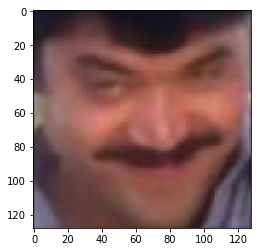

In [60]:
# Print the image along with the predictions of your trained model. Do this preferably on your training dataset so that you can check your predictions along with the real target
i = random.choice(train.index)
img_name = train.ID[i]

img = imageio.imread(os.path.join(data_dir, 'Train', img_name))
imshow(tf.resize(img, (128, 128)))
pred = model.predict_classes(train_x)
print('Original:', train.Class[i], 'Predicted:', lb.inverse_transform(pred[i]))
